# Retrieving and Analyzing Equities Data Using Qunald API

<p>The objective of the following report is to use the Qunadl API to retrieve equities data from the Frankfurt Stock Exhange (FSE), which is available for free. We'll try and analyze the stock prices of a company called Carl Zeiss Meditec, which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X.</p> 


## Tools and Skills
<p><b><em>Language:</em></b> Python</p>
<p><em><b>Skills</b>:</em> 
    <ul>
        <li><b>Data mining:</b> API, requests, json
        <li><b>Data manipulation:</b> dictionaries, list comprehensions, datetime</li>
        <li><b>Visualization:</b> matplotlib</li>
    </ul>
</p>

<p>The first step is to register for a free account on the http://www.quandl.com website to receive a unique API key to access the data. Qaundl is currently the most widely used aggregator of financial market data.</p>

In [2]:
# Store the API key as a string
API_KEY = 'YOUR-API'

In [2]:
# First, import the relevant modules
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [3]:
# Now, call the Quandl API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returned

# add API_KEY variable to url
url = 'https://www.quandl.com/api/v3/datasets/FSE/AFX_X.json?start_date=2018-12-14&end_date=2018-12-14&api_key='+API_KEY

# package the request, send the request and catch the response
r = requests.get(url)

In [4]:
# Inspect the JSON structure of the object you created, and take note of how nested it is,
# as well as the overall structure

# look at the text of the request
txt = r.text
print(txt)

{"dataset":{"id":10095370,"dataset_code":"AFX_X","database_code":"FSE","name":"Carl Zeiss Meditec (AFX_X)","description":"Stock Prices for Carl Zeiss Meditec (AFX) from the Frankfurt Stock Exchange.\u003cbr\u003e\u003cbr\u003eTrading System: Xetra\u003cbr\u003e\u003cbr\u003eISIN: DE0005313704","refreshed_at":"2018-12-28T22:32:28.905Z","newest_available_date":"2018-12-28","oldest_available_date":"2000-06-07","column_names":["Date","Open","High","Low","Close","Change","Traded Volume","Turnover","Last Price of the Day","Daily Traded Units","Daily Turnover"],"frequency":"daily","type":"Time Series","premium":false,"limit":null,"transform":null,"column_index":null,"start_date":"2018-12-14","end_date":"2018-12-14","data":[["2018-12-14",null,72.05,70.45,71.3,null,null,null,null,null,null]],"collapse":null,"order":null,"database_id":6129}}


***
Based on the overall structure, the data that we need are contained in the "columns_names" and "data" keys.

## Tasks to complete:

1. [Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).](#collect_data)
2. [Convert the returned JSON object into a Python dictionary.](#convert_JSON)
3. [Calculate what the highest and lowest opening prices were for the stock in this period.](#opening_prices)
4. [What was the largest change in any one day (based on High and Low price)?](#largest_change)
5. [What was the largest change between any two days (based on Closing Price)?](#largest_change_two)
6. [What was the average daily trading volume during this year?](#avg_volume)
7. [(Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)](#median_trading)

<a id='collect_data'></a>

In [5]:
# Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
url = 'https://www.quandl.com/api/v3/datasets/FSE/AFX_X.json?start_date=2017-01-01&end_date=2017-12-31&api_key='+API_KEY

# look at the text of the request
r = requests.get(url)


<a id='convert_JSON'></a>

In [6]:
# confirm type of fle returned
json_file = r.json()
print('file type: ',type(json_file))

file type:  <class 'dict'>


In [7]:
# save the file locally
with open('json_file.json', 'w') as outfile:
    json.dump(json_file, outfile)

In [8]:
# set up the environment with necessary modules IF starting a new session
import requests
import json

In [9]:
# use context to open the file
try:
    with open('json_file.json') as json_file:
        json_data = json.load(json_file)
except:
    print('File not found')

In [10]:
# confirm the data type is a dictionary
print(type(json_data))

<class 'dict'>


In [11]:
# look at the structure of the dictionary
json_data.keys()

dict_keys(['dataset'])

### Get Relevant Data for Analysis
Since we only want the data for two of the dictionary values: 'column_names' and 'data', we use the <code>popitem() </code> method to return the last item in the dictionary as a tuple

In [12]:
# return the last item in the dictionary (values)
t = json_data.popitem()
print(type(t))

<class 'tuple'>


In [13]:
# get the column names
col_names = t[1]['column_names']
print(col_names)

['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover', 'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover']


In [14]:
# get the stock data as  list
stock_data = t[1]['data']
print(type(stock_data))

# confirm the structure of the data matches the column names
print(stock_data[0])

<class 'list'>
['2017-12-29', 51.76, 51.94, 51.45, 51.76, None, 34640.0, 1792304.0, None, None, None]


<a id='opening_prices'></a>

3. Calculate what the highest and lowest opening prices were for the stock in this period

In [15]:
# get a list of the opening prices - second item - from the stock_data
opening = [price[1] for price in stock_data if price[1] is not None] 

In [16]:
print('lowest opening prices:',min(opening))
print('highest opening prices:',max(opening))

lowest opening prices: 34.0
highest opening prices: 53.11


* <b>Looking at Opening Prices Throughtout the Year<b>

In [17]:
# Get the dates from the stock data including only dates when opening prices is not null
# format dates as datetime to plot
dates = [datetime.strptime(item[0], '%Y-%m-%d').date() for item in stock_data if item[1] is not None]

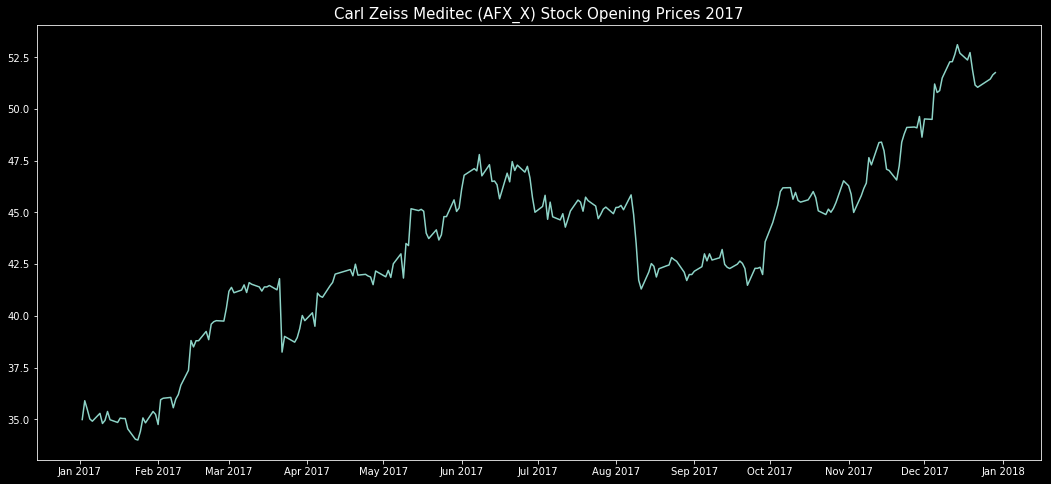

In [18]:
# set the size of the plot
plt.rcParams["figure.figsize"] = [18,8]
plt.style.use(['dark_background']) # set dark ground to show legends
fig, ax = plt.subplots() # use to unpack and use figure and plotting attributes more easily
ax.plot(dates,opening)
ax.set_title('Carl Zeiss Meditec (AFX_X) Stock Opening Prices 2017', fontsize = 15)
ax.xaxis.set_major_locator(mdates.MonthLocator()) # show xticks for every month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # display only month
#fig.autofmt_xdate()

<a id='largest_change'></a>

4. What was the largest change in any one day (based on High and Low price)?

In [19]:
change = [price[2] - price[3] for price in stock_data]

In [20]:
change.sort()
print(change[-1])

2.8100000000000023


<a id='largest_change_two'></a>

5. What was the largest change between any two days (based on Closing Price)?

In [21]:
closing = [price[4] for price in stock_data if price[4] is not None]
change = 0
next_index = 0
for i in range(len(closing)):
    if closing[i]< closing[next_index]:
        closing[next_index] = closing[i]
    l = closing[i] - closing[next_index]
    if l > change:
        change = l
print(change)

5.979999999999997


<a id='avg_volume'></a>

6. What was the average daily trading volume during this year?

In [22]:
avg_volume = [item[6] for item in stock_data if item[6] is not None]
print('average daily trading volume during 2107:',sum(avg_volume)/len(avg_volume))

average daily trading volume during 2107: 89124.33725490196


<a id='median_trading'></a>

7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

In [23]:
volume = [item[6] for item in stock_data if item[6] is not None]

In [24]:
len(volume)

255

In [25]:
def median_volume(ls):
    ls.sort()
    if len(ls) %2 != 0:
        index=ls[int(len(ls)/2)]
        return index
    else:
        right_index = len(ls)//2
        left_index = right_index - 1
        return (ls[left_index] + ls[right_index])/2

In [26]:
median_trading = median_volume(volume)
print(median_trading)

76286.0
